In [1]:
from softcomputing_packages_bu import *

Importing Soft Computing Packages . . .
Copyright 2019, Seok-Jun Bu, Softcomputing Lab. All Rights Reserved.
. . . Done.


In [2]:
# Load Dataset, Fillna, Categorical
dataset = pd.read_csv('./columnsmerge.csv', encoding='euc-kr')
dataset = dataset.replace([np.inf, -np.inf], np.nan)
dataset = dataset.fillna(0)
print(dataset.shape)
print(dataset)
# To Categorical
dataset_code = dataset['상권_코드']
dataset_code_cat = pd.get_dummies(dataset_code)
print(dataset_code_cat.shape)
print(dataset.shape)
dataset = pd.concat([dataset, dataset_code_cat], axis=1)
dataset = dataset.drop(columns=['상권_코드'])
print(dataset.shape)
dataset_service_code = dataset['서비스_업종_코드']
dataset_service_code_cat = pd.get_dummies(dataset_service_code)
print(dataset_service_code_cat.shape)
dataset = pd.concat([dataset, dataset_service_code], axis=1)
dataset = dataset.drop(columns=['서비스_업종_코드'])
print(dataset.shape)

(89020, 37)
       기준_년_코드  기준_분기_코드    상권_코드 서비스_업종_코드    당월_매출_금액  day/weekend  \
0         2018         1  1000001  CS100001   922621269     2.378944   
1         2018         1  1000001  CS100002   176034744     3.347352   
2         2018         1  1000001  CS100003    45454124     5.604302   
3         2018         1  1000001  CS100004   351079289     1.213114   
4         2018         1  1000001  CS100005   163624875     5.480042   
...        ...       ...      ...       ...         ...          ...   
89015     2018         4  1001010  CS300009  1503286282    12.267540   
89016     2018         4  1001010  CS300011    10444544     3.219634   
89017     2018         4  1001010  CS300014    16119654     4.065346   
89018     2018         4  1001010  CS300016     6958385     1.852921   
89019     2018         4  1001010  CS300017     2873564     1.142856   

       female/male  2030_rate  2030_rate.1  06~11rate  ...  관공서_수  은행_수  약국_수  \
0         0.862990   0.409338     0.409338

In [3]:
# X, Y, Definition
Y = dataset['당월_매출_금액'].values
X = dataset.drop(columns=['기준_분기_코드', '기준_년_코드', '당월_매출_금액', '매출/점포']).values
print(X.shape, Y.shape)

(89020, 1003) (89020,)


In [4]:
# Y Scaling
Y_scaled = []
Y_max, Y_min = np.max(Y), np.min(Y)
for r in range(Y.shape[0]):
    Y_scaled.append((Y[r]-Y_min)/(Y_max-Y_min))
Y_scaled = np.asarray(Y_scaled)
Y = Y_scaled

In [5]:
# Split Tr, Te
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, shuffle=True)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(62313, 1003) (62313,)
(26707, 1003) (26707,)


In [6]:
# Build Model
m_input = Input(shape=(X.shape[1],))
H = Dense(800, activation='tanh')(m_input)
H = Dense(512, activation='tanh')(H)
H = Dropout(0.5)(H)
H = Dense(128, activation='tanh')(H)
H = Dense(64, activation='tanh')(H)
m_output = Dense(1, activation='sigmoid')(H)
model_mlp = Model(m_input, m_output)
model_mlp.compile(loss='binary_crossentropy', optimizer='adam')
model_mlp.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1003)]            0         
_________________________________________________________________
dense (Dense)                (None, 800)               803200    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               410112    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65    

In [7]:
# Train, Validate Model
es = EarlyStopping(monitor='val_loss', mode='min', patience=80)
model_mlp.fit(X_train, Y_train, validation_data=(X_test, Y_test), shuffle=True, verbose=2, epochs=1000, batch_size=4000, callbacks=[es])

Train on 62313 samples, validate on 26707 samples
Epoch 1/1000
62313/62313 - 2s - loss: 0.1534 - val_loss: 0.0675
Epoch 2/1000
62313/62313 - 0s - loss: 0.0693 - val_loss: 0.0690
Epoch 3/1000
62313/62313 - 0s - loss: 0.0689 - val_loss: 0.0678
Epoch 4/1000
62313/62313 - 0s - loss: 0.0687 - val_loss: 0.0680
Epoch 5/1000
62313/62313 - 0s - loss: 0.0686 - val_loss: 0.0678
Epoch 6/1000
62313/62313 - 0s - loss: 0.0685 - val_loss: 0.0677
Epoch 7/1000
62313/62313 - 0s - loss: 0.0685 - val_loss: 0.0677
Epoch 8/1000
62313/62313 - 0s - loss: 0.0685 - val_loss: 0.0676
Epoch 9/1000
62313/62313 - 0s - loss: 0.0684 - val_loss: 0.0676
Epoch 10/1000
62313/62313 - 0s - loss: 0.0684 - val_loss: 0.0676
Epoch 11/1000
62313/62313 - 0s - loss: 0.0684 - val_loss: 0.0676
Epoch 12/1000
62313/62313 - 0s - loss: 0.0684 - val_loss: 0.0676
Epoch 13/1000
62313/62313 - 0s - loss: 0.0683 - val_loss: 0.0676
Epoch 14/1000
62313/62313 - 0s - loss: 0.0683 - val_loss: 0.0676
Epoch 15/1000
62313/62313 - 0s - loss: 0.0684 - v

KeyboardInterrupt: 

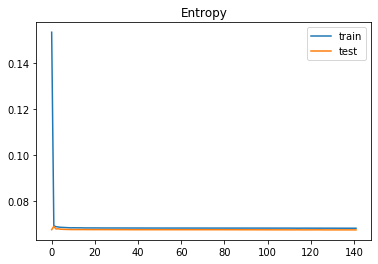

In [8]:
# Learning Curve
plot_history(model_mlp)

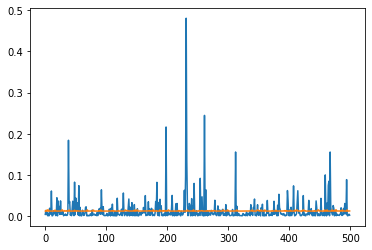

In [9]:
# Reconstructed
vis_range = 500
vis_start = 2000
Y_test_hat = model_mlp.predict(X_test, batch_size=4000)
plt.plot(Y_test[vis_start:vis_start+vis_range])
plt.plot(Y_test_hat[vis_start:vis_start+vis_range])
plt.show()

In [10]:
# Build Model
c_input = Input(shape=(X.shape[1],))
H = Reshape((X.shape[1], 1))(c_input)
H = Conv1D(filters=20, kernel_size=(2), activation='tanh', padding='same')(H)
H = MaxPool1D(2)(H)
H = Dropout(0.5)(H)
H = Conv1D(filters=20, kernel_size=(2), activation='tanh', padding='same')(H)
H = MaxPool1D(2)(H)
H = Dropout(0.5)(H)
H = Conv1D(filters=20, kernel_size=(2), activation='tanh', padding='same')(H)
H = MaxPool1D(2)(H)
H = Dropout(0.5)(H)
H = Flatten()(H)
H = Dense(800, activation='tanh')(H)
H = Dense(512, activation='tanh')(H)
H = Dropout(0.5)(H)
H = Dense(128, activation='tanh')(H)
H = Dense(64, activation='tanh')(H)
c_output = Dense(1, activation='sigmoid')(H)
model_cnn = Model(c_input, c_output)
model_cnn.compile(loss='binary_crossentropy', optimizer='adam')
model_cnn.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1003)]            0         
_________________________________________________________________
reshape (Reshape)            (None, 1003, 1)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1003, 20)          60        
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 501, 20)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 501, 20)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 501, 20)           820       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 20)           0   

In [17]:
# Train, Validate Model
es = EarlyStopping(monitor='val_loss', mode='min', patience=80)
model_cnn.fit(X_train, Y_train, validation_data=(X_test, Y_test), shuffle=True, verbose=2, epochs=1000, batch_size=4000, callbacks=[es])

Train on 62313 samples, validate on 26707 samples
Epoch 1/1000
62313/62313 - 1s - loss: 0.0671 - val_loss: 0.0648
Epoch 2/1000
62313/62313 - 1s - loss: 0.0672 - val_loss: 0.0648
Epoch 3/1000
62313/62313 - 1s - loss: 0.0671 - val_loss: 0.0648
Epoch 4/1000
62313/62313 - 1s - loss: 0.0671 - val_loss: 0.0646
Epoch 5/1000
62313/62313 - 1s - loss: 0.0669 - val_loss: 0.0645
Epoch 6/1000
62313/62313 - 1s - loss: 0.0669 - val_loss: 0.0645
Epoch 7/1000
62313/62313 - 1s - loss: 0.0668 - val_loss: 0.0645
Epoch 8/1000
62313/62313 - 1s - loss: 0.0668 - val_loss: 0.0645
Epoch 9/1000
62313/62313 - 1s - loss: 0.0668 - val_loss: 0.0644
Epoch 10/1000
62313/62313 - 1s - loss: 0.0668 - val_loss: 0.0644
Epoch 11/1000
62313/62313 - 1s - loss: 0.0666 - val_loss: 0.0643
Epoch 12/1000
62313/62313 - 1s - loss: 0.0666 - val_loss: 0.0644
Epoch 13/1000
62313/62313 - 1s - loss: 0.0666 - val_loss: 0.0643
Epoch 14/1000
62313/62313 - 1s - loss: 0.0665 - val_loss: 0.0643
Epoch 15/1000
62313/62313 - 1s - loss: 0.0665 - v

KeyboardInterrupt: 

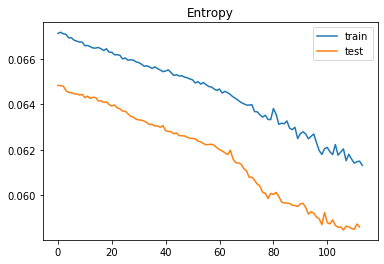

In [18]:
# Learning Curve
plot_history(model_cnn)

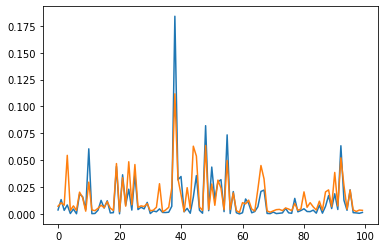

In [19]:
# Reconstructed
vis_range = 100
vis_start = 2000
Y_test_hat = model_cnn.predict(X_test, batch_size=4000)
plt.plot(Y_test[vis_start:vis_start+vis_range])
plt.plot(Y_test_hat[vis_start:vis_start+vis_range])
plt.show()